# Assignment 4: Random Forests and Gradient Boosting
## Boston Housing Assignment

 Scikit Learn documentation for this assignment:
 http://scikit-learn.org/stable/modules/model_evaluation.html 
 http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
 http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
 http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

 
 Textbook reference materials:
 Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
 and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
 has sections covering linear regression, polynomial regression,
 and regularized linear models. Sample code from the book is 
 available on GitHub at https://github.com/ageron/handson-ml


## Requirements for this assignment

    1) Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study.
    2) Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. 
    3) Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net.
    4) Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. 
    5) Try alternative versions of random forests and gradient boosting. Select the best modeling method.  Employ that method on the full data set, obtaining results that you can report to management.

Python scikit-learn should be your primary environment for conducting this research. Try alternative versions of random forests and gradient boosting. Select a best modeling method for the Boston Housing Study. Employ that method on the full data set, obtaining results that you can report to management.

## Management problem:

Imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

# Discussion

After getting our data and libraries loaded in section A. Section B is dedicated to performing some exploratory data analysis. Some of data are transformed here to adjust the shape of the values relative to our dependant variable (log_MV). There were a few things I was aiming to do with this assignment the first was to evaluate the. The first was to imagine myself as a scientist with tranditional statistical approaches; EDA followed by selecting the most significant features, and contrast that to a modern machine learning route where the more impactful features are identified. The second was to evaluate the statistics generated by a few different methodologis (linear regression versus ElasticNet and linear regression versus lasso).

As for the first objective (section C) a subset of the columns were selected via exploratory analysis. Linear regression and elastic net are evaluated on the subset data. It is evident from the results below that these two methodologies produce very similar results in terms of coefficient estimates and term significance. To contrast this historical approach (section D), lasso regression was employed to identify the features which were most impactful. After the important features were identified, linear regression was used to contrast the results obtained from the lasso methodology. Again the results obtained were very similar interms of coefficients, error, and feature significance. Likewise as an additonal example a linear regression of all availble terms was conducted demonstrating the presence of overfitting of the model evidenced by the low significance of a number of terms. 

A key learning from this exercise is that machine learning outperforms more traditional approaches. For example when a scientist selects hypothesized impactful features they may have inherent bias because they lack the ability to see the data in the appropriate multidimensional space. Evaluating the data in a tranditional sense results in a model with a mean 8 fold CV RMSE score of ~0.22 in the scale of our dependant varaible. Conversely the most impactful features identified via lasso and subsequently evaluated with linear regression have an 8 fold CV RMSE score of ~0.21 allowing for a small reduction in the RMSE associated with the dependant variable improving our certainty and potentially allowing for larger profits with real estate investment by the firm. An additional learning is the power of lasso to downselect features for linear regression as the regularization methodology reduces the impact of the coefficient for a given feature to essentially zero. As such I would recommend this approach.

Within each regression section (with the exception of linear regression performed on all features; section D2) the following generally applies:
    


    1) The train and test data are split from the data of interest
    2) The model is fit on the training set using a pipeline
    3) Predictions are made on the traning set and a parity plot is generated of predictions vs observed values
    4) The training set is then passed to cross validation and RMSE is reported of each fold along with the average of all folds
    5) Addiitonal Summary statistics for the coefficients and overal model are generated - Training Statistics
    6) The model for the test set is fit using the same pipeline employed for the training set
    7) Predictions are made on the test set and a parity plot is generated of predictions vs observed values
    8) Addiitonal summary statistics for the coefficients and overal model are generated - Test Statistics


# A: Libraries and data read-in

In [53]:
RANDOM_SEED = 70

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from math import sqrt  # for root mean-squared error calculation

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

#import from SKlearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from  sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.pipeline import Pipeline

from scipy import stats

# read data for the Boston Housing Study
boston_input = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/boston.csv")

#sets random seed for entire notebook
RANDOM_SEED = 42

#kfold for CV of models
kfold = KFold(n_splits=5, random_state=RANDOM_SEED)
testkfold = KFold(n_splits=2, random_state=RANDOM_SEED)

### Functions to yield information about the models

In [54]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
   # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

 
#This function print's statistics in a nice table format for linear regression
#requires the use of dataframe as inputs for all except the coefs arg.
def model_statistics(x_actual, y_actual, y_predict, coefs):

    matX = pd.DataFrame({"Constant":np.ones(len(x_actual))}).join(pd.DataFrame(x_actual.reset_index(drop=True)))
    MSE = (sum((y_actual-y_predict)**2))/(len(matX)-len(matX.columns))
    

    var_b = MSE*(np.linalg.inv(np.dot(matX.T,matX)).diagonal())
    
    sd_b = np.sqrt(var_b)
    ts_b = coefs/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(matX)-len(matX.columns)-1))) for i in ts_b]
    

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    coefs = np.round(coefs,4)

    SummaryDF = pd.DataFrame()
    SummaryDF["Coefficients"],SummaryDF["Standard Errors"],SummaryDF["t values"],SummaryDF["Probabilities"] = [coefs,sd_b,ts_b,p_values]

    return(SummaryDF)

# This is a function which returns the fomula of the model with it's coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
        lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) 
        for coef, name in lst)


# B: Descriptive Stats and Dataframe inspect

In [55]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
display(boston_input.head())
display(boston_input.tail())

print('\n\nGeneral description of the boston_input DataFrame:\n')
display(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\n\nGeneral description of the boston DataFrame:\n')

display(boston.info())

print('\nDescriptive statistics of the boston DataFrame:\n')
display(boston.describe())


boston DataFrame (first and last five rows):


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0




General description of the boston_input DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


None



General description of the boston DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None


Descriptive statistics of the boston DataFrame:



,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'mv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

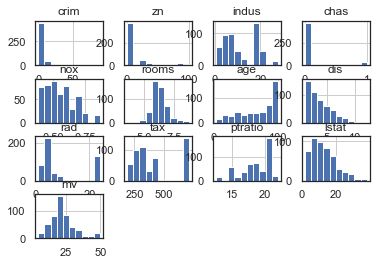

In [56]:
boston.hist()

## Correlation Heatmap

Text(0.5, 0.98, 'Correlation Heatmap for Boston')

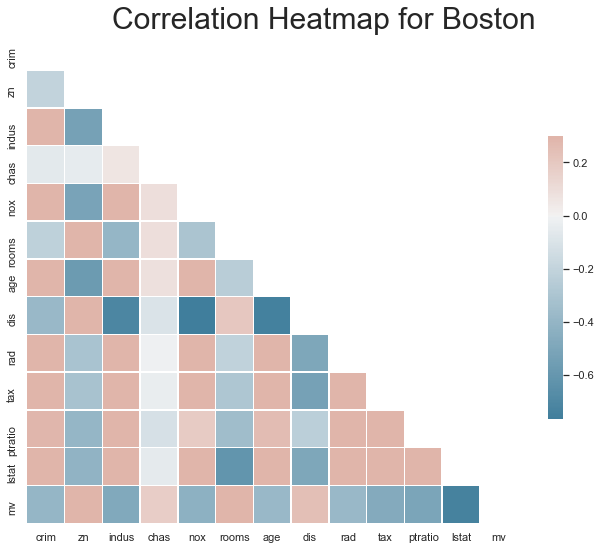

In [57]:
sns.set_theme(style="white")

#correlation matrix
corr =boston.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.subplots_adjust(top=1)
plt.suptitle("Correlation Heatmap for Boston",fontsize= 30)


<AxesSubplot:xlabel='ptratio', ylabel='tax'>

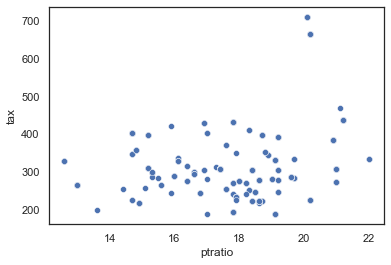

In [58]:
sns.scatterplot(boston.ptratio, boston.tax)

<AxesSubplot:xlabel='tax', ylabel='mv'>

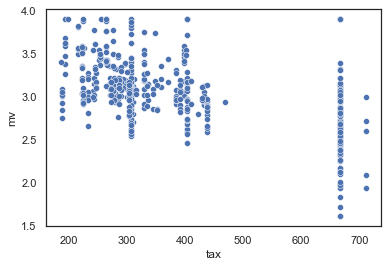

In [59]:
sns.scatterplot(boston.tax, np.log(boston.mv))


<AxesSubplot:>

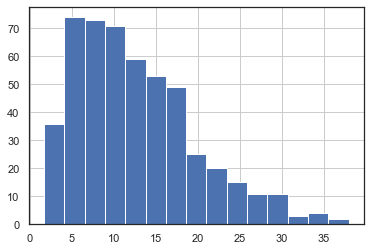

In [60]:
boston.lstat.hist(bins=15)

<AxesSubplot:>

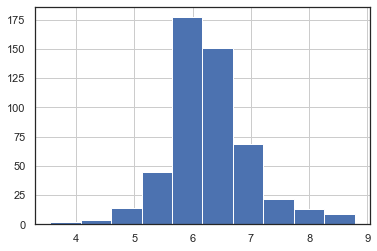

In [61]:
boston.rooms.hist()

<AxesSubplot:>

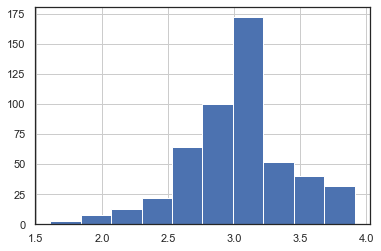

In [62]:
np.log(boston.mv).hist()

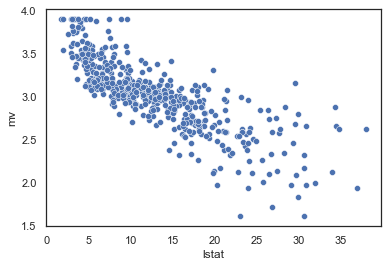

In [63]:
logplot = sns.scatterplot(y=np.log(boston.mv), x=boston.lstat)

# C. Model Construction
## C1.) Data Prep

In [64]:
#get our data back in order
boston_new =boston.copy()
boston_new['log_MV']= np.log(boston_new['mv'])

boston_new.drop(['mv'], axis=1, inplace=True)



In [65]:
# split our data now that we have all features again
Train, Test = train_test_split(boston_new, test_size = 0.2, random_state = RANDOM_SEED)

#separate features from labels for test
init_Test_Labels = Test['log_MV'].copy()
init_Test_Features = Test.drop('log_MV', axis=1)

#separate features from labels for train
init_y = Train['log_MV'].copy()
init_X = Train.drop('log_MV', axis=1)


## D2.) Lasso Regression on Train

In [66]:
lasso_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(alpha=0.1))
        ])

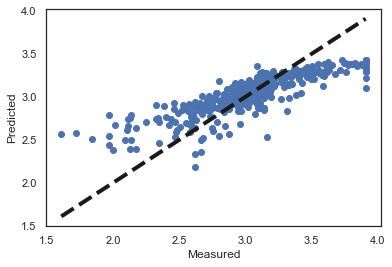

In [67]:
#fit our data using lasso
lasso_pipe.fit(init_X, init_y)
lasso_Xtrain_pred =lasso_pipe.predict(init_X)

#pairty plot
fig, Lasso_train = plt.subplots()
Lasso_train.scatter(init_y, lasso_Xtrain_pred)
Lasso_train.plot([init_y.min(), init_y.max()], [init_y.min(), init_y.max()], 'k--', lw=4)
Lasso_train.set_xlabel('Measured')
Lasso_train.set_ylabel('Predicted')

plt.show()



### Lasso Training Model Statistics

In [68]:
# regression statistics functions
regression_results(init_y, lasso_Xtrain_pred)

lasso_coefs = np.append(lasso_pipe.named_steps['regressor'].intercept_, lasso_pipe.named_steps['regressor'].coef_)
model_statistics(x_actual=init_X, y_actual=init_y, y_predict=lasso_Xtrain_pred, coefs=lasso_coefs)

explained_variance:  0.6378
r2:  0.6378
MAE:  0.183
MSE:  0.0609
RMSE:  0.2468


,Coefficients,Standard Errors,t values,Probabilities
0,3.0458,0.288,10.564,0.000
1,-0.0189,0.002,-10.301,0.000
2,0.0000,0.001,0.000,1.000
3,-0.0000,0.004,-0.000,1.000
4,0.0000,0.051,0.000,1.000
5,-0.0000,0.224,-0.000,1.000
6,0.0355,0.024,1.453,0.147
7,-0.0000,0.001,-0.000,1.000
8,0.0000,0.012,0.000,1.000
9,-0.0000,0.004,-0.000,1.000


### Lasso impactful features
    most impactful features (in descending order) are: lstat, rooms, crim, ptratio (this last one is pretty small

In [69]:
# Get our model formula
print ("Lasso model:", pretty_print_coefs(lasso_pipe.named_steps['regressor'].coef_))


Lasso model: -0.019 * X0 + 0.0 * X1 + -0.0 * X2 + 0.0 * X3 + -0.0 * X4 + 0.036 * X5 + -0.0 * X6 + 0.0 * X7 + -0.0 * X8 + -0.0 * X9 + -0.012 * X10 + -0.197 * X11


In [70]:
#corresponding features for the model formula
init_X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat'],
      dtype='object')

Cross Validation of the train data using lasso

In [71]:
cv_results = np.sqrt(-cross_val_score(lasso_pipe, init_X, init_y, cv=kfold, scoring= 'neg_mean_squared_error'))
print(cv_results)

#stores average RMSE 
lasso_train_RMSE = np.mean(cv_results)
#stores average r2
lasso_train_acc = np.mean(cross_val_score(lasso_pipe, init_X, init_y, cv=kfold, scoring='r2'))




[0.26415699 0.25259227 0.25066415 0.26083024 0.22174328]


### Lasso evaluation on test data

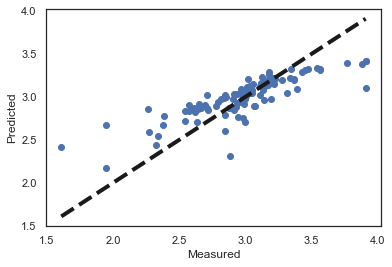

In [72]:

#predict test labels using lasso
Lasso_test_pred = lasso_pipe.predict(init_Test_Features)

#parity plot
fig, Lasso_test = plt.subplots()
Lasso_test.scatter(init_Test_Labels, Lasso_test_pred)
Lasso_test.plot([init_Test_Labels.min(), init_Test_Labels.max()], [init_Test_Labels.min(), init_Test_Labels.max()], 'k--', lw=4)
Lasso_test.set_xlabel('Measured')
Lasso_test.set_ylabel('Predicted')

plt.show()


### Lasso Model Statistics (test)

In [73]:
# model statistics functions
lasso_Test_pred = lasso_pipe.predict(init_Test_Features)
regression_results(init_Test_Labels, lasso_Test_pred)

lasso_coefs = np.append(lasso_pipe.named_steps['regressor'].intercept_, lasso_pipe.named_steps['regressor'].coef_)
model_statistics(x_actual=init_Test_Features, y_actual=init_Test_Labels, y_predict=lasso_Test_pred, coefs=lasso_coefs)

explained_variance:  0.6401
r2:  0.6382
MAE:  0.1699
MSE:  0.0568
RMSE:  0.2383


,Coefficients,Standard Errors,t values,Probabilities
0,3.0458,0.628,4.847,0.000
1,-0.0189,0.006,-3.184,0.002
2,0.0000,0.002,0.000,1.000
3,-0.0000,0.009,-0.000,1.000
4,0.0000,0.118,0.000,1.000
5,-0.0000,0.526,-0.000,1.000
6,0.0355,0.054,0.659,0.511
7,-0.0000,0.002,-0.000,1.000
8,0.0000,0.024,0.000,1.000
9,-0.0000,0.008,-0.000,1.000


In [74]:
# gets crossvalidation results for lasso test data.
cv_results = np.sqrt(-cross_val_score(lasso_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring= 'neg_mean_squared_error'))

#stores average RMSE 
lasso_test_RMSE = np.mean(cv_results)
#stores average r2
lasso_test_acc = np.mean(cross_val_score(lasso_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring='r2'))


[0.18297618 0.30054206]


# C2.) LinearRegression

## C2a.) Linear Regression on Train (all features)

In [76]:
Linear_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

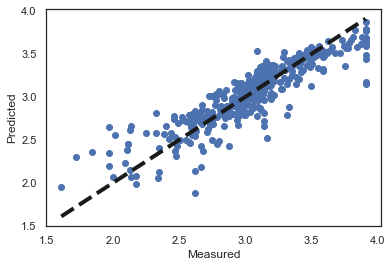

In [77]:
#fit all features with linear regressor
Linear_pipe.fit(init_X, init_y)

#predict labels on all features 
Linear_Xsub_train_pred =Linear_pipe.predict(init_X)

#parity plot
fig, Lin_train = plt.subplots()
Lin_train.scatter(init_y, Linear_Xsub_train_pred)
Lin_train.plot([init_y.min(), init_y.max()], [init_y.min(), init_y.max()], 'k--', lw=4)
Lin_train.set_xlabel('Measured')
Lin_train.set_ylabel('Predicted')

plt.show()

### Linear Regression Statistics (all features)

In [78]:
# model statistics functions
regression_results(init_y, Linear_Xsub_train_pred)

sub_coefs = np.append(Linear_pipe.named_steps['regressor'].intercept_, Linear_pipe.named_steps['regressor'].coef_)

model_statistics(x_actual= init_X, y_actual= init_y, y_predict=Linear_Xsub_train_pred, coefs=sub_coefs)

explained_variance:  0.79
r2:  0.79
MAE:  0.1376
MSE:  0.0353
RMSE:  0.1879


,Coefficients,Standard Errors,t values,Probabilities
0,3.0458,0.220,13.873,0.000
1,-0.0913,0.001,-65.359,0.000
2,0.0207,0.001,32.146,0.000
3,0.0170,0.003,6.272,0.000
4,0.0277,0.038,0.720,0.472
5,-0.0891,0.171,-0.522,0.602
6,0.0726,0.019,3.898,0.000
7,-0.0005,0.001,-0.918,0.359
8,-0.1095,0.009,-12.015,0.000
9,0.0850,0.003,27.789,0.000


## From this we can see that R2 is higher (RMSE also lower) for linear regression. 
    1) However, there are insignificant terms in our model indicated by low t-stats and high p-values in the summary table above.
    2) The regularization of the lasso regressior penalizes the contribution of those coefficients such that it sets them to zero.
    
### Let's use the most prominant features from lasso regression (those with the largest coefficients) for our linear regression

## C2b.) Linear Regression with lasso downselected features

In [79]:
boston_subset = Train[['lstat', 'crim' , 'rooms', 'log_MV']]

X_sub = boston_subset.iloc[:,0:3]
y_sub = boston_subset.iloc[:,-1]

X_sub.columns

Index(['lstat', 'crim', 'rooms'], dtype='object')

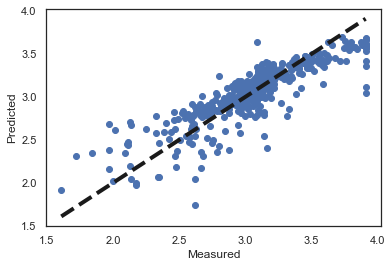

In [80]:
Linear_pipe.fit(X_sub, y_sub)

Linear_Xsub_train_pred =Linear_pipe.predict(X_sub)

fig, train = plt.subplots()
train.scatter(y_sub, Linear_Xsub_train_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
train.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
train.set_xlabel('Measured')
train.set_ylabel('Predicted')

plt.show()

### Downselected Linear Regression model statistics

In [81]:
regression_results(y_sub,Linear_Xsub_train_pred)
sub_coefs = np.append(Linear_pipe.named_steps['regressor'].intercept_, Linear_pipe.named_steps['regressor'].coef_)
model_statistics(x_actual= X_sub, y_actual= y_sub, y_predict=Linear_Xsub_train_pred, coefs=sub_coefs)

explained_variance:  0.7319
r2:  0.7319
MAE:  0.1577
MSE:  0.0451
RMSE:  0.2123


,Coefficients,Standard Errors,t values,Probabilities
0,3.0458,0.137,22.310,0.0
1,-0.2256,0.002,-110.526,0.0
2,-0.0963,0.001,-72.961,0.0
3,0.1066,0.019,5.607,0.0


In [82]:


#get RMSE for the folds
cv_results = np.sqrt(-cross_val_score(Linear_pipe, X_sub, y_sub, cv=kfold, scoring= 'neg_mean_squared_error'))
print(cv_results)

#stores average RMSE 
linreg_train_RMSE = np.mean(cv_results)
#stores average r2
linreg_train_acc = np.mean(cross_val_score(Linear_pipe, init_X, init_y, cv=kfold, scoring='r2'))

[0.21587317 0.22326349 0.23235583 0.21168224 0.20525629]


## implement the identified feature downselect for linear regression on the test data

In [83]:
Test_subset = Test[['lstat', 'crim' , 'rooms','log_MV']]
Test_X_sub = Test_subset.iloc[:,0:3]
Test_y_sub = Test_subset.iloc[:,-1]


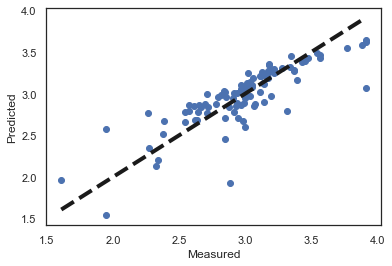

In [84]:

Linear_Xsub_test_pred =Linear_pipe.predict(Test_X_sub)

fig, Test_ln = plt.subplots()
Test_ln.scatter(Test_y_sub, Linear_Xsub_test_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
Test_ln.plot([Test_y_sub.min(), Test_y_sub.max()], [Test_y_sub.min(), Test_y_sub.max()], 'k--', lw=4)
Test_ln.set_xlabel('Measured')
Test_ln.set_ylabel('Predicted')

plt.show()

### Summary Statistis for downselected linear regression (test)

In [85]:
### Noregression_results(y_sub,Linear_Xsub_train_pred)
regression_results(Test_y_sub,Linear_Xsub_test_pred)
test_sub_coefs = np.append(Linear_pipe.named_steps['regressor'].intercept_, Linear_pipe.named_steps['regressor'].coef_)
model_statistics(x_actual= Test_X_sub, y_actual= Test_y_sub, y_predict=Linear_Xsub_test_pred, coefs=test_sub_coefs)

explained_variance:  0.6797
r2:  0.6797
MAE:  0.1608
MSE:  0.0503
RMSE:  0.2242


,Coefficients,Standard Errors,t values,Probabilities
0,3.0458,0.311,9.805,0.000
1,-0.2256,0.005,-44.607,0.000
2,-0.0963,0.004,-23.488,0.000
3,0.1066,0.044,2.432,0.017


In [108]:
# get CV results for linnear regressor with downselected features on test dataa
cv_results = np.sqrt(-cross_val_score(Linear_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring= 'neg_mean_squared_error'))

#stores average RMSE 
linear_test_RMSE = np.mean(cv_results)
#stores average r2
linear_test_acc = np.mean(cross_val_score(Linear_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring='r2'))

## C3. RandomForest Regression

In [86]:
init_X.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28


In [87]:
init_Test_Features.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27


In [88]:
init_y.head()

477    2.484907
15     2.990720
332    2.965273
423    2.595255
19     2.901422
Name: log_MV, dtype: float64

In [89]:
init_Test_Labels.head()

173    3.161247
274    3.478158
491    2.610070
72     3.126761
452    2.778819
Name: log_MV, dtype: float64

In [90]:
#Forest_pipe = Pipeline([
#        ('regressor', RandomForestRegressor(n_estimators = 2000, max_depth=4, max_features ='log2', oob_score=True, random_state= RANDOM_SEED))
#        ])


Forest_pipe = Pipeline([
        ('regressor', RandomForestRegressor(n_estimators = 800, max_depth=4, max_features ='log2', oob_score=True, random_state= RANDOM_SEED))
        ])
Forest_pipe.fit(init_X, init_y)

Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=4, max_features='log2',
                                       n_estimators=800, oob_score=True,
                                       random_state=42))])

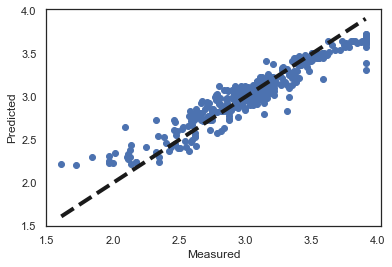

In [91]:
forest_Train_pred =Forest_pipe.predict(init_X)

fig, Train_Forest = plt.subplots()
Train_Forest.scatter(init_y, forest_Train_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
Train_Forest.plot([init_y.min(), init_y.max()], [init_y.min(), init_y.max()], 'k--', lw=4)
Train_Forest.set_xlabel('Measured')
Train_Forest.set_ylabel('Predicted')

plt.show()

In [92]:
importances = Forest_pipe.steps[0][1].feature_importances_
feature_names = init_X.columns

In [93]:
feature_series = pd.Series(importances, index=feature_names)
feature_series.sort_values(inplace=True)


<AxesSubplot:>

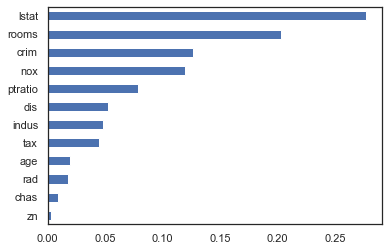

In [94]:
feature_series.plot.barh()

In [95]:
#get RMSE for the folds
cv_results = cross_val_score(Forest_pipe, init_X, init_y, cv=kfold, scoring = 'neg_mean_squared_error')

#stores average RMSE 
forest_train_RMSE = np.sqrt(-cv_results).mean()
#stores average r2
forest_train_acc = np.mean(cross_val_score(Forest_pipe, init_X, init_y, cv=kfold, scoring='r2'))

In [96]:
# fraction of RMSE as fraction of mean response
# np.mean(cv_results*-1)/ np.mean(init_y)*100

## Random Forest on Test data

In [97]:
forest_Test_pred =Forest_pipe.predict(init_Test_Features)


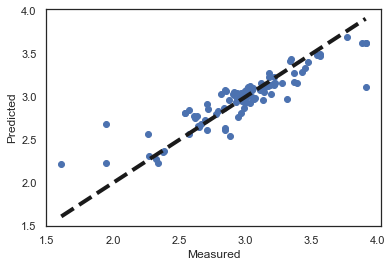

In [98]:
fig, Forest_test = plt.subplots()
Forest_test.scatter(init_Test_Labels, forest_Test_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
Forest_test.plot([init_Test_Labels.min(), init_Test_Labels.max()], [init_Test_Labels.min(), init_Test_Labels.max()], 'k--', lw=4)
Forest_test.set_xlabel('Measured')
Forest_test.set_ylabel('Predicted')

plt.show()

In [109]:
# get CV results for randomforrest regressor  on test dataa
cv_results = np.sqrt(-cross_val_score(Forest_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring= 'neg_mean_squared_error'))

#stores average RMSE 
forest_test_RMSE = np.mean(cv_results)
#stores average r2
forest_test_acc = np.mean(cross_val_score(Forest_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring='r2'))

## C4. Gradient Boost Regression

In [99]:
gbr_pipe = Pipeline([
        ('regressor', GradientBoostingRegressor(n_estimators = 200 , max_depth=2, learning_rate = 0.2, random_state= RANDOM_SEED))
        ])
gbr_pipe.fit(init_X, init_y)

Pipeline(steps=[('regressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=2,
                                           n_estimators=200,
                                           random_state=42))])

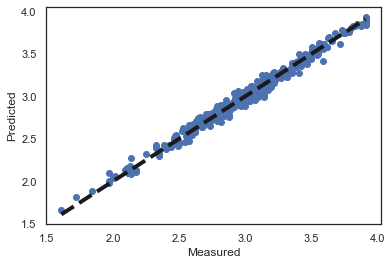

In [100]:
gbr_Train_pred = gbr_pipe.predict(init_X)

fig, Train_gbr = plt.subplots()
Train_gbr.scatter(init_y, gbr_Train_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
Train_gbr.plot([init_y.min(), init_y.max()], [init_y.min(), init_y.max()], 'k--', lw=4)
Train_gbr.set_xlabel('Measured')
Train_gbr.set_ylabel('Predicted')

plt.show()

In [101]:
#get RMSE for the folds
cv_results = cross_val_score(gbr_pipe, init_X, init_y, cv=kfold, scoring = 'neg_mean_squared_error')

#stores average RMSE 
gbr_train_RMSE = np.sqrt(-cv_results).mean()
#stores average r2
gbr_train_acc = np.mean(cross_val_score(gbr_pipe, init_X, init_y, cv=kfold, scoring='r2'))

In [102]:
gbr_train_RMSE

0.1671694377994728

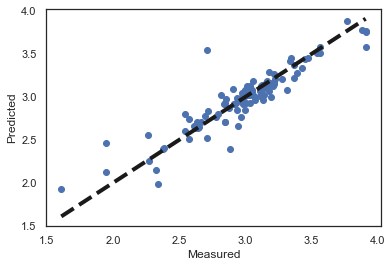

In [103]:
gbr_Test_pred =gbr_pipe.predict(init_Test_Features)


fig, gbr_test = plt.subplots()
gbr_test.scatter(init_Test_Labels,gbr_Test_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
gbr_test.plot([init_Test_Labels.min(), init_Test_Labels.max()], [init_Test_Labels.min(), init_Test_Labels.max()], 'k--', lw=4)
gbr_test.set_xlabel('Measured')
gbr_test.set_ylabel('Predicted')

plt.show()

In [110]:
# get CV results for randomforrest regressor  on test dataa
cv_results = np.sqrt(-cross_val_score(gbr_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring= 'neg_mean_squared_error'))

#stores average RMSE 
gbr_test_RMSE = np.mean(cv_results)
#stores average r2
gbr_test_acc = np.mean(cross_val_score(gbr_pipe, init_Test_Features, init_Test_Labels, cv=testkfold, scoring='r2'))

In [104]:
lasso_train_RMSE
linreg_train_RMSE
forest_train_RMSE
gbr_train_RMSE

lasso_test_RMSE
linear_test_RMSE
forest_test_RMSE
gbr_test_RMSE

lasso_train_acc
linreg_train_acc
forest_train_acc
gbr_train_acc

lasso_test_acc
linear_test_acc
forest_test_acc
gbr_test_acc



0.8309010769878361